In [7]:

import cv2
import numpy as np

def do_nothing(x):
    pass

# yellow_BGR = np.uint8([[[0, 255, 255]]])  # BGR value of yellow color
# yellow_HSV = cv2.cvtColor(yellow_BGR, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds
ls = 0  
hs = 255  
lv = 0  
hv = 255  

# Define the lower and upper bounds for yellow in HSV
lhy = 13
hhy = 39

# Define the lower and upper bounds for blue in HSV
lhb = 95
hhb = 110

# Define the lower and upper bounds for green in HSV
lhg = 50
hhg = 90
c=1
vid1= "balls1.mp4"
cam = cv2.VideoCapture(vid1)
if not cam.isOpened():
    print('cannot open video')
    exit()

i=0
while True:
    success, frame = cam.read()
    
    if(success == False):
        cam.release()
        cam = cv2.VideoCapture(vid1) #video feed
        continue
    
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # mask = cv2.inRange(frame1, (lh,ls,lv), (hh, hs, hv))

        # Mask for yellow color
    mask_yellow = cv2.inRange(frame1, (lhy, ls, lv), (hhy, hs, hv))

    # Mask for blue color
    mask_blue = cv2.inRange(frame1, (lhb, ls, lv), (hhb, hs, hv))

    # Mask for green color
    mask_green = cv2.inRange(frame1, (lhg, ls, lv), (hhg, hs, hv))

    # # Combine both masks
    # mask_combined = cv2.bitwise_or(mask_yellow, mask_blue)
    # mask_combined = cv2.bitwise_or(mask_combined, mask_green)

    kernel = np.ones((5,5), np.uint8)

    erodedy = cv2.morphologyEx(mask_yellow, cv2.MORPH_ERODE, kernel)

    erodedb = cv2.morphologyEx(mask_blue, cv2.MORPH_ERODE, kernel)
    # kernel = np.ones((8,8), np.uint8)
    # blue = cv2.morphologyEx(erodedb,cv2.MORPH_OPEN, kernel) 

    erodedg = cv2.morphologyEx(mask_green, cv2.MORPH_ERODE, kernel)
    kernel = np.ones((8,8), np.uint8)
    green = cv2.morphologyEx(erodedg,cv2.MORPH_OPEN, kernel) 

    # Combine both masks
    mask_combined = cv2.bitwise_or(erodedy, erodedb) #erodedg)
    mask_combined = cv2.bitwise_or(mask_combined, green) #blue)

    erodedc = cv2.morphologyEx(mask_combined, cv2.MORPH_ERODE, kernel)


     # Perform the operation
    output = cv2.connectedComponentsWithStats(erodedc, 8, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    #print(num_labels)
    # The second cell is the label matrix
    labels = output[1]
    # cv2.imshow("labels", labels.astype(np.uint8)*4)
    # The third cell is the stat matrix
    stats = output[2]
    #print(stats[5])

    for i in range(1, num_labels): #num_labels = num of objects
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        a = stats[i, cv2.CC_STAT_AREA]
        density = a/(w*h)
        ndensity = round(density, 2)
        color = None
        if mask_yellow[t + h // 2, l + w // 2]:
            color = "Yellow"
            # print(a)
        elif mask_blue[t + h // 2, l + w // 2]:
            color = "Blue"
        elif mask_green[t + h // 2, l + w // 2]:
            color = "Green"

        if color and ndensity > 0.6 and 900<a<4000 :
            org = (l, t)
            fontFace = cv2.FONT_HERSHEY_SIMPLEX
            cv2.rectangle(frame, (l, t), (l + w, t + h), (120, 34, 98), 3)
            cv2.putText(frame, f"{color}", org, fontFace, 0.5, (255, 0, 0), 1, cv2.LINE_AA)



    # cv2.imshow("eroded", eroded)
    cv2.imshow("frame", frame)

    # Displaying both masks...
    # cv2.imshow("Yellow Mask", erodedy)
    # cv2.imshow("Blue Mask", erodedb)
    cv2.imshow("Combined Mask", erodedc)

    key = cv2.waitKey(20) & 0xff
    if(key ==ord('q')): break

    #i +=1


cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

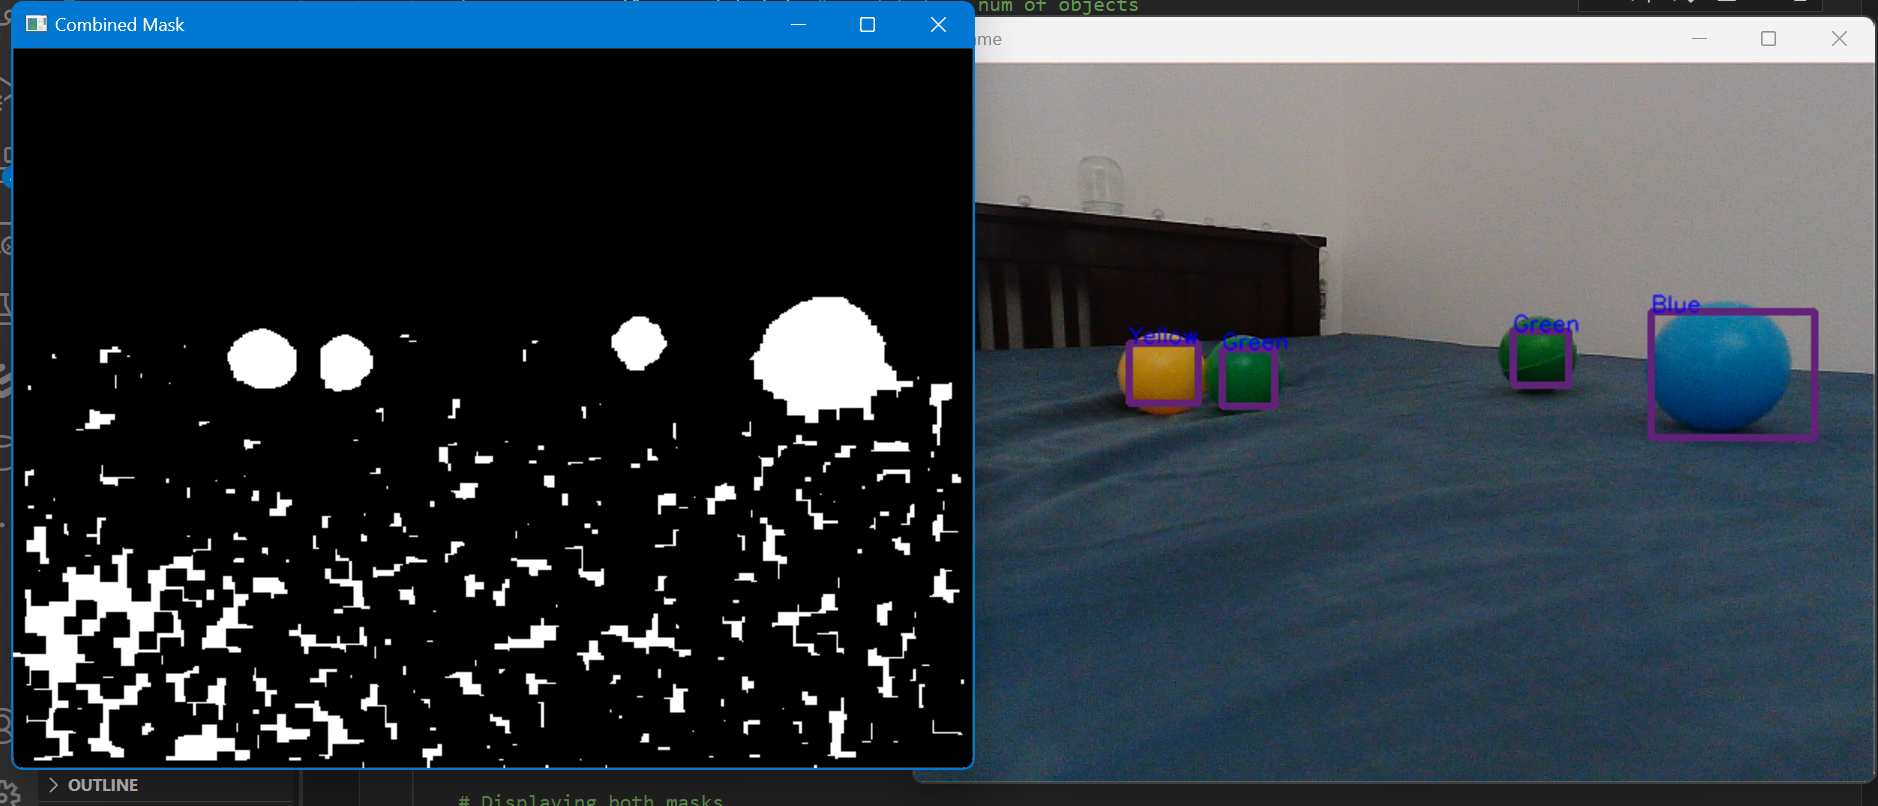